# USD_Studies

From the course: https://courses.nvidia.com/courses/course-v1:DLI+S-FX-02+V1/course/

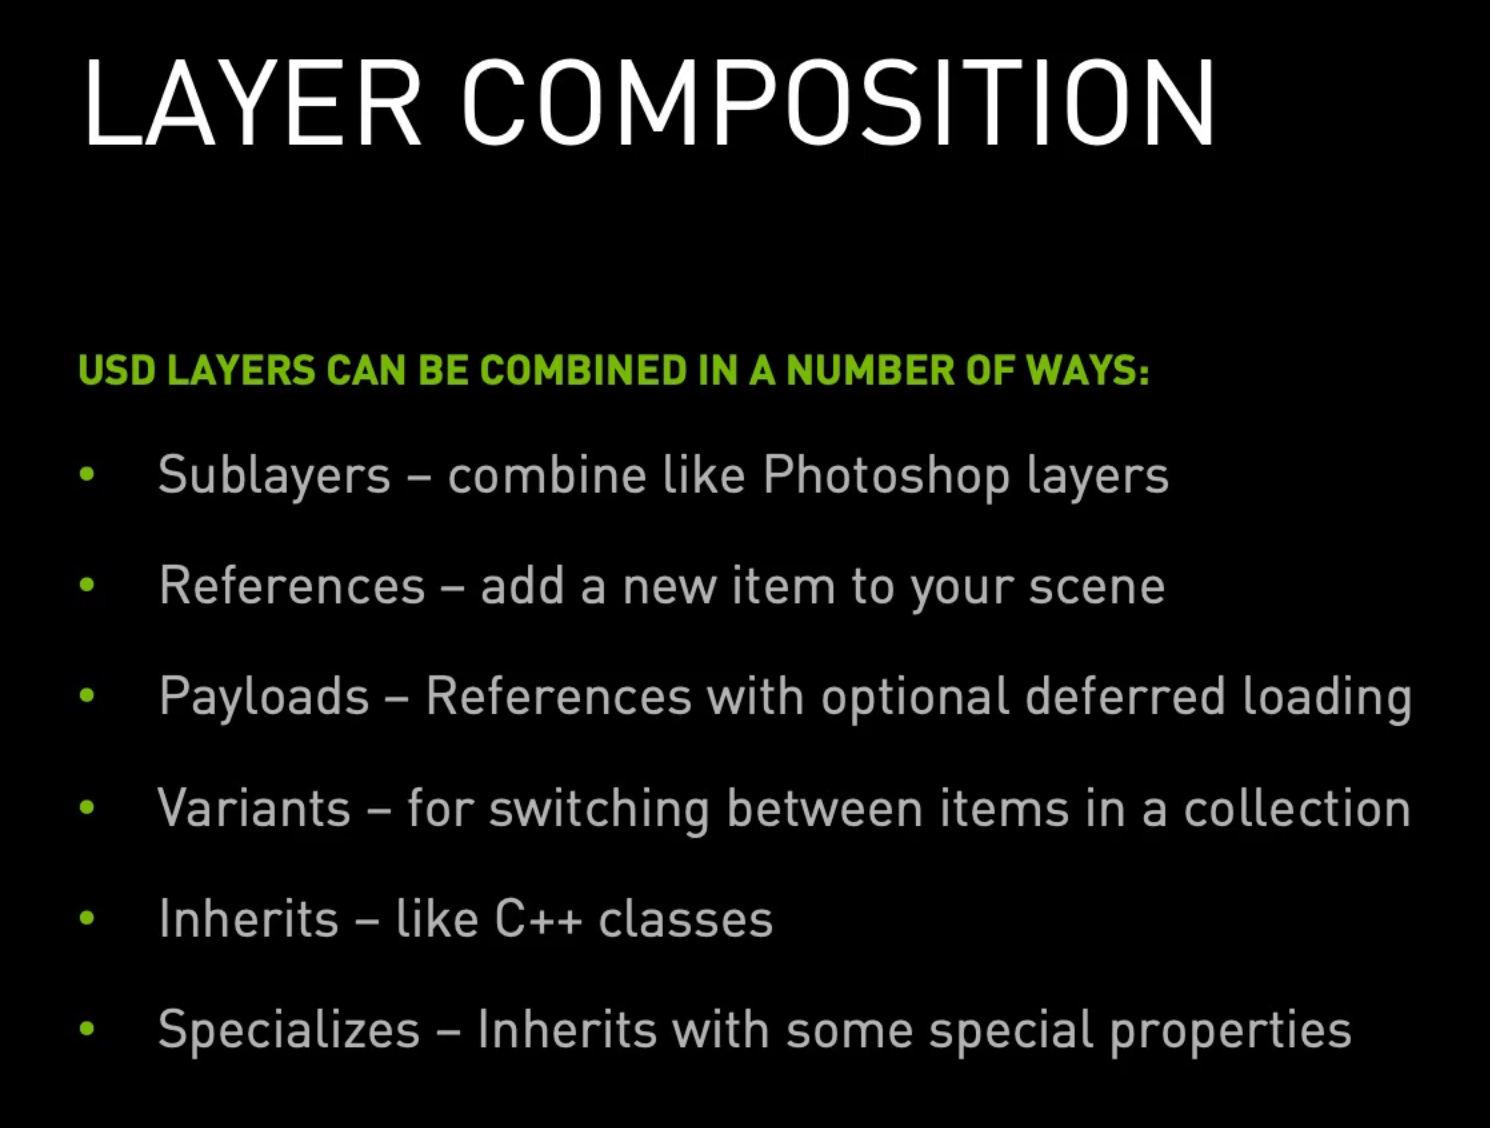

#### Reference would equate to instances (of the original object).

#### Payloads are a sub category of References - in that they can be turned on and off. So References could be indented on this slide.

| Layer Compositions | |
| ----------- | ----------- |
|Sublayers| |
|References| |
|            | Payloads |
|Variants||
|Inherits||
|Specializes||

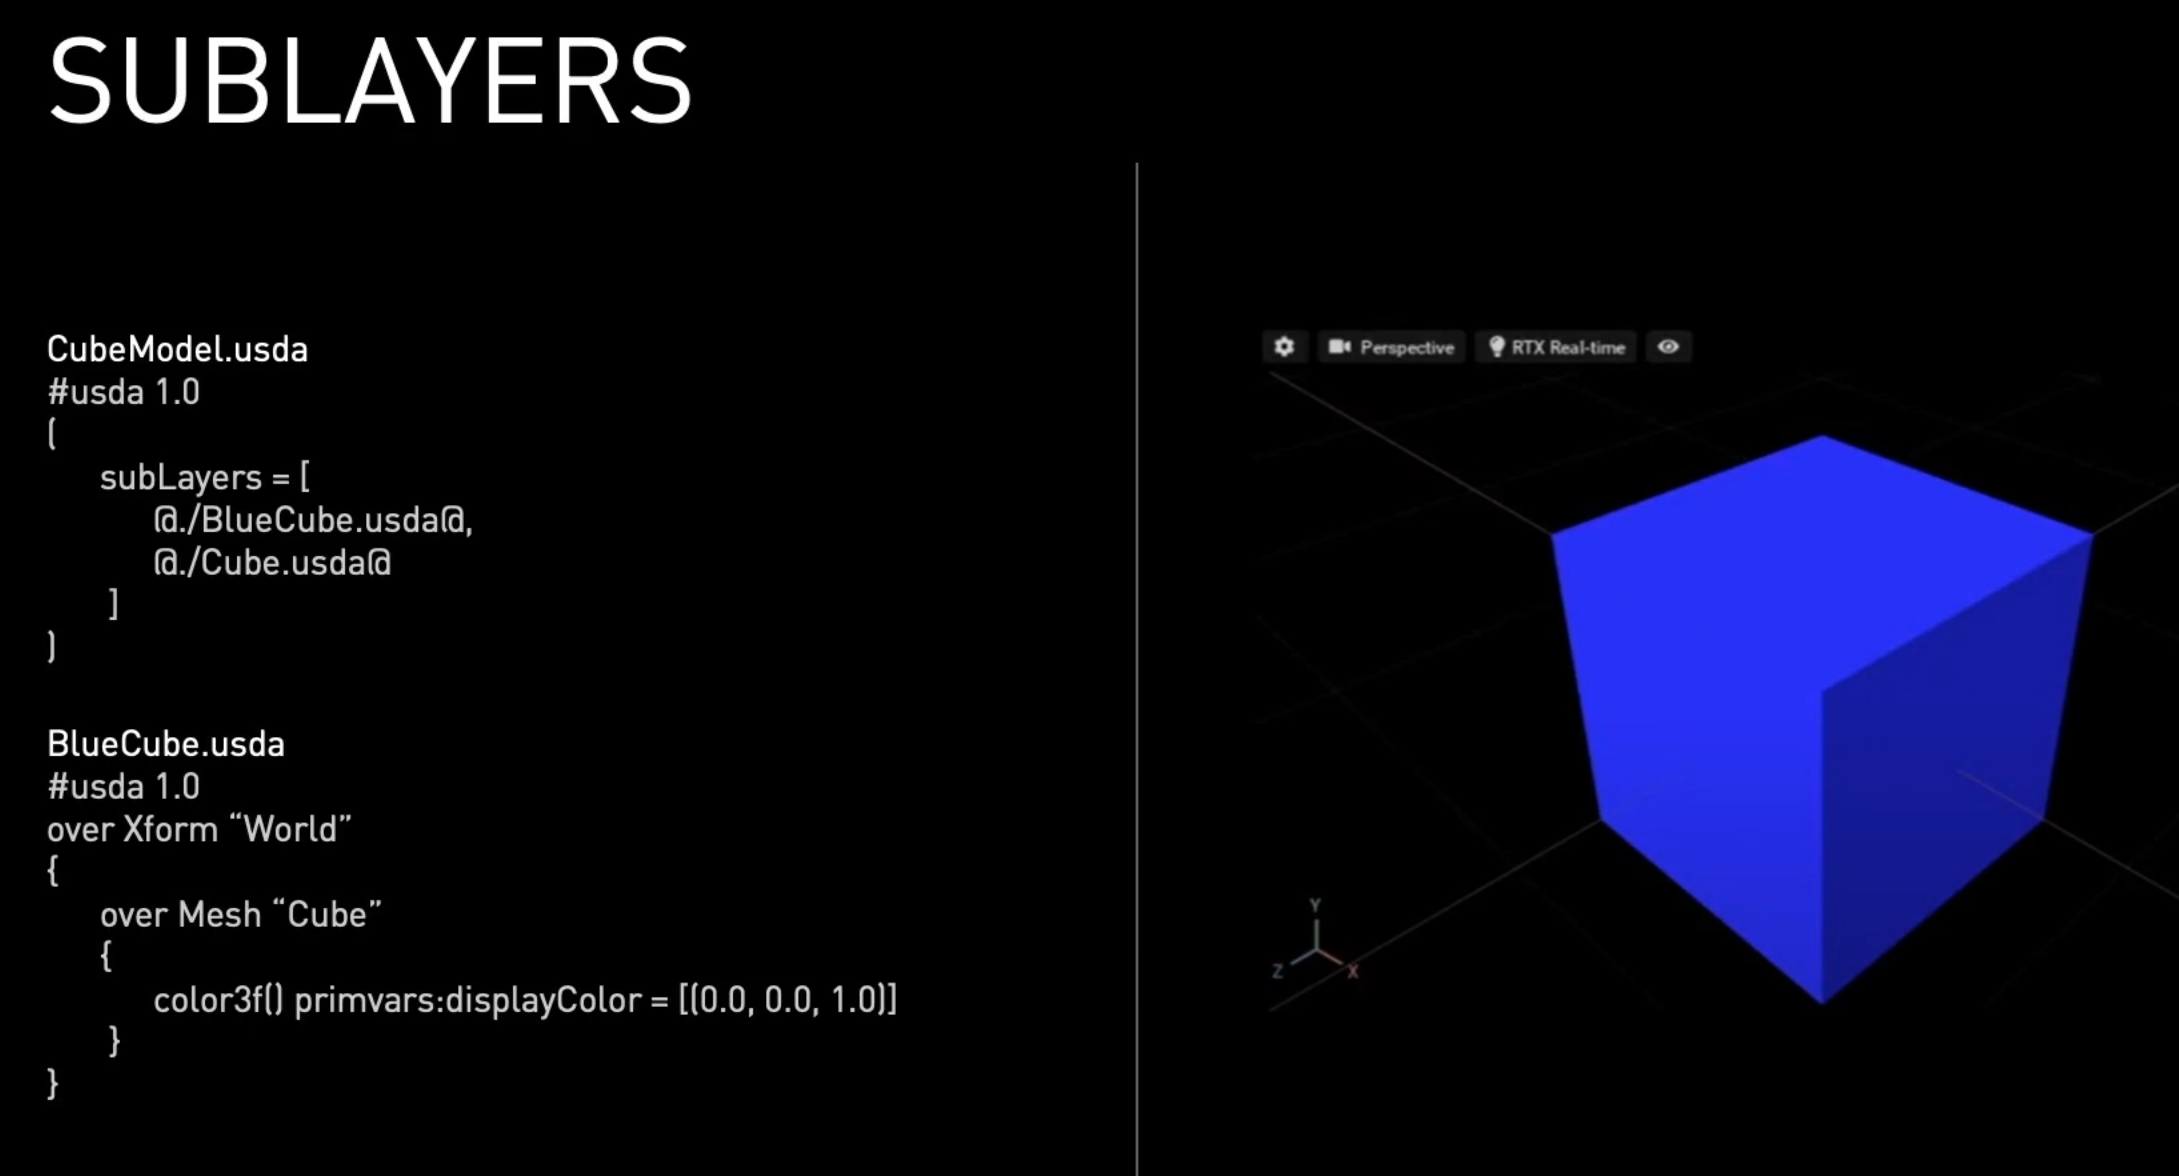

In this example, there are two overs.

In [1]:
'over Xform "World"'

'over Xform "World"'

In [2]:
'over Mesh Cube'

'over Mesh Cube'

In [4]:
%%HTML
<video width="1236" height="1008" controls>
  <source src=".\Over_Layers_Red_Blue.mp4" type="video/mp4">
</video>